In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head(10)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


Проверим есть ли пропуски

In [4]:
data.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

Посмтрим количество блюд к каждой кухне

In [5]:
data['cuisine'].value_counts()

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

Тоже самое только в %

In [6]:
data['cuisine'].value_counts()/data['cuisine'].value_counts().sum()*100

cuisine
italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: count, dtype: float64

In [7]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Графики для визуального сравнения количества

<Axes: xlabel='Percent', ylabel='cuisine'>

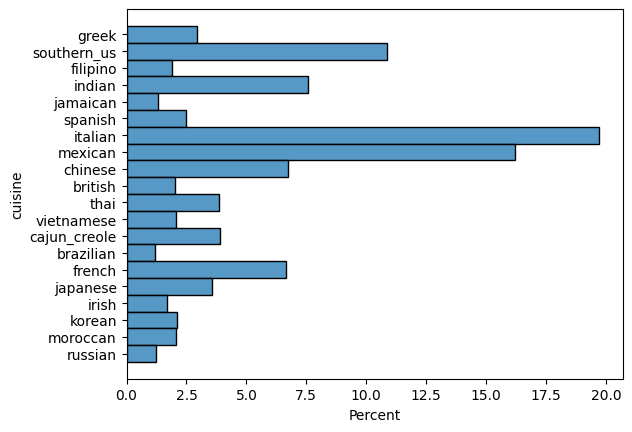

In [9]:
sns.histplot(data=data, y='cuisine', stat='percent')

Id блюда не будет влиять на кухню

In [10]:
data = data.drop('id', axis=1)

In [11]:
data

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,chinese,"[boneless chicken skinless thigh, minced garli..."


Переведем все элементы в одну строку

In [12]:
def massive_to_string(massive):
    string = ' '.join(massive)
    return string

Просто посмотрим из чего состоит столбец ингредиентов

In [13]:
data['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [14]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [15]:
# Библиотека для обработки языка 
import nltk
# Скачиваем базу стоп слов
nltk.download("stopwords")
from nltk.corpus import stopwords
# Ипортируем пунктационные знаки 
from string import punctuation
# Закинем в переменную стоп слова на английском
english_stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\Harry
[nltk_data]     Potter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data['ingredients'] = data['ingredients'].map(lambda string: massive_to_string(string))
data['ingredients'] = data['ingredients'].map(lambda string: string.lower())
data['ingredients'] = data['ingredients'].map(lambda string: string.split(' '))

In [17]:
data['ingredients']

0        [romaine, lettuce, black, olives, grape, tomat...
1        [plain, flour, ground, pepper, salt, tomatoes,...
2        [eggs, pepper, salt, mayonaise, cooking, oil, ...
3                     [water, vegetable, oil, wheat, salt]
4        [black, pepper, shallots, cornflour, cayenne, ...
                               ...                        
39769    [light, brown, sugar, granulated, sugar, butte...
39770    [kraft, zesty, italian, dressing, purple, onio...
39771    [eggs, citrus, fruit, raisins, sourdough, star...
39772    [boneless, chicken, skinless, thigh, minced, g...
39773    [green, chile, jalapeno, chilies, onions, grou...
Name: ingredients, Length: 39774, dtype: object

In [18]:
# Обработаем наш столбик
# Проверяем для каждой строки в нашем столбике, есть ли слово в ингредиенте в списке стоп-слов
# Проверяем не пустой ли спискок
# Проверяем нет ли в списке '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

data['ingredients'] = data['ingredients'].map(lambda x: [word for word in x 
                                                        if word not in english_stopwords
                                                        and word != ' '
                                                        and word.strip() not in punctuation
                                                        ])

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
 
wnl = WordNetLemmatizer()
data['ingredients'] = data['ingredients'].map(lambda x: [wnl.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to C:\Users\Harry
[nltk_data]     Potter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Вот как теперь выглядит наш столбик
data['ingredients']

0        [romaine, lettuce, black, olive, grape, tomato...
1        [plain, flour, ground, pepper, salt, tomato, g...
2        [egg, pepper, salt, mayonaise, cooking, oil, g...
3                     [water, vegetable, oil, wheat, salt]
4        [black, pepper, shallot, cornflour, cayenne, p...
                               ...                        
39769    [light, brown, sugar, granulated, sugar, butte...
39770    [kraft, zesty, italian, dressing, purple, onio...
39771    [egg, citrus, fruit, raisin, sourdough, starte...
39772    [boneless, chicken, skinless, thigh, minced, g...
39773    [green, chile, jalapeno, chilies, onion, groun...
Name: ingredients, Length: 39774, dtype: object

Делаем лемитизацию, это когда у нас есть слово и мы берем только корень
Когда мы ставим слово в ед.ч, н.ф это стемминг

In [21]:
data['ingredients'] = data['ingredients'].map(lambda x: massive_to_string(x))
data['ingredients']

0        romaine lettuce black olive grape tomato garli...
1        plain flour ground pepper salt tomato ground b...
2        egg pepper salt mayonaise cooking oil green ch...
3                           water vegetable oil wheat salt
4        black pepper shallot cornflour cayenne pepper ...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    kraft zesty italian dressing purple onion broc...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onion ground blac...
Name: ingredients, Length: 39774, dtype: object

In [22]:
X = data['ingredients']

In [23]:
y = data['cuisine']
y

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [24]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
# 20% валид, 16% тест.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [27]:
# векторизатор
vectorizer = TfidfVectorizer()

In [28]:
# На обучающей выборке обучили векторизатор
X_transformed_train = vectorizer.fit_transform(X_train)
# Изменили валид выборку
X_transformed_valid = vectorizer.transform(X_valid)

In [29]:
# Создаем модельку стохастического градиентного спуска, то же самое что и градиентный спуск, но градиент ищем на подвыборке, а не на всей выборке
model_sgd = SGDClassifier(random_state=42)
model_sgd.fit(X_transformed_train, y_train)

SGDClassifier(random_state=42)

In [30]:
predicted_sgd = model_sgd.predict(X_transformed_valid)
print(metrics.classification_report(predicted_sgd, y_valid))

              precision    recall  f1-score   support

   brazilian       0.49      0.67      0.57        61
     british       0.26      0.77      0.39        53
cajun_creole       0.68      0.79      0.73       283
     chinese       0.89      0.74      0.81       611
    filipino       0.46      0.68      0.55        93
      french       0.61      0.63      0.62       526
       greek       0.64      0.74      0.69       214
      indian       0.90      0.85      0.88       639
       irish       0.36      0.68      0.47        81
     italian       0.92      0.78      0.84      1846
    jamaican       0.65      0.87      0.74        68
    japanese       0.69      0.80      0.74       245
      korean       0.70      0.83      0.76       139
     mexican       0.93      0.89      0.91      1398
    moroccan       0.78      0.86      0.82       152
     russian       0.45      0.57      0.50        70
 southern_us       0.78      0.67      0.72       989
     spanish       0.41    

In [31]:
# метод ближайших соседей
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_transformed_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
predicted_knn = model_knn.predict(X_transformed_valid)
print(metrics.classification_report(predicted_knn, y_valid))

              precision    recall  f1-score   support

   brazilian       0.57      0.60      0.59        80
     british       0.45      0.63      0.52       111
cajun_creole       0.70      0.72      0.71       322
     chinese       0.88      0.68      0.77       664
    filipino       0.43      0.65      0.52        89
      french       0.60      0.55      0.58       601
       greek       0.62      0.72      0.66       215
      indian       0.84      0.85      0.84       601
       irish       0.50      0.66      0.57       113
     italian       0.87      0.74      0.80      1831
    jamaican       0.59      0.77      0.67        70
    japanese       0.62      0.84      0.71       209
      korean       0.72      0.80      0.76       149
     mexican       0.89      0.83      0.86      1433
    moroccan       0.70      0.81      0.75       145
     russian       0.35      0.65      0.45        48
 southern_us       0.68      0.71      0.70       818
     spanish       0.39    

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Обучим лес деревьев
model_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_forest.fit(X_transformed_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [35]:
predicted_forest = model_forest.predict(X_transformed_valid)
print(metrics.classification_report(predicted_forest, y_valid))

              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00         0
     british       0.00      0.00      0.00         0
cajun_creole       0.00      0.00      0.00         0
     chinese       0.42      0.76      0.54       283
    filipino       0.00      0.00      0.00         0
      french       0.00      0.00      0.00         0
       greek       0.00      0.00      0.00         0
      indian       0.39      0.94      0.55       248
       irish       0.00      0.00      0.00         0
     italian       1.00      0.26      0.41      6029
    jamaican       0.00      0.00      0.00         0
    japanese       0.00      0.00      0.00         0
      korean       0.00      0.00      0.00         0
     mexican       0.75      0.72      0.74      1395
    moroccan       0.00      0.00      0.00         0
     russian       0.00      0.00      0.00         0
 southern_us       0.00      0.00      0.00         0
     spanish       0.00    

C:\Users\Harry Potter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harry Potter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harry Potter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [37]:
# бустинг
import xgboost as xgb

In [38]:
# Наши классы должны соответсвовать числам

cuisines = {'brazilian':1,       
     'british':2,       
     'cajun_creole':3,       
     'chinese':4,      
     'filipino':5,      
     'french':6,      
     'greek':7,       
     'indian':8,       
     'irish':9,       
     'italian':10,       
     'jamaican':11,       
     'japanese':12,       
     'korean':13,      
     'mexican':14,       
     'moroccan':15,       
     'russian':16,       
     'southern_us':17,       
     'spanish':18,       
     'thai':19,       
     'vietnamese':0}

# А тут соответсвенно все переделали
y_train_xgb = pd.DataFrame(y_train)['cuisine'].map(cuisines)
y_valid_xgb = pd.DataFrame(y_valid)['cuisine'].map(cuisines)
y_valid_xgb

21513     4
1796     18
21861     7
26571     8
28720    10
         ..
9473     14
1530     10
317       4
38284     8
2929      6
Name: cuisine, Length: 7955, dtype: int64

In [39]:

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax'
    , n_estimators=250
    , learning_rate=0.10
    , colsample_bytree=0.70
    , max_depth=3
    , n_jobs=4,
    num_class=20
)
xgb_model.fit(
    X_transformed_train, y_train_xgb
    , early_stopping_rounds=5
    , eval_set=[(X_transformed_valid, y_valid_xgb)]
    , verbose=False
)


C:\Users\Harry Potter\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=4, num_class=20,
              num_parallel_tree=None, ...)

In [40]:
predicted_xgb = xgb_model.predict(X_transformed_valid)
print(metrics.classification_report(predicted_xgb, y_valid_xgb))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       111
           1       0.55      0.82      0.66        56
           2       0.31      0.70      0.43        70
           3       0.68      0.83      0.75       270
           4       0.84      0.76      0.80       561
           5       0.43      0.69      0.53        85
           6       0.59      0.57      0.58       564
           7       0.66      0.77      0.71       214
           8       0.87      0.86      0.87       604
           9       0.46      0.76      0.57        91
          10       0.90      0.74      0.82      1910
          11       0.55      0.88      0.68        57
          12       0.68      0.83      0.75       233
          13       0.70      0.86      0.77       136
          14       0.92      0.90      0.91      1371
          15       0.75      0.86      0.80       144
          16       0.44      0.68      0.53        57
          17       0.76    

In [41]:
xgb_model = xgb.XGBClassifier(
    booster='gblinear',
    objective='multi:softmax'
    , n_estimators=250
    , learning_rate=0.10
    , n_jobs=4,
)
xgb_model.fit(
    X_transformed_train, y_train_xgb
    , early_stopping_rounds=5
    , eval_set=[(X_transformed_valid, y_valid_xgb)]
    , verbose=False
)

C:\Users\Harry Potter\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [42]:
predicted_xgb = xgb_model.predict(X_transformed_valid)
print(metrics.classification_report(predicted_xgb, y_valid_xgb))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       133
           1       0.56      0.72      0.63        65
           2       0.48      0.57      0.52       133
           3       0.65      0.73      0.69       292
           4       0.84      0.76      0.80       563
           5       0.57      0.69      0.62       111
           6       0.65      0.63      0.64       566
           7       0.68      0.75      0.71       228
           8       0.86      0.87      0.86       599
           9       0.46      0.59      0.51       117
          10       0.88      0.81      0.85      1695
          11       0.66      0.87      0.75        69
          12       0.68      0.76      0.72       253
          13       0.74      0.76      0.75       161
          14       0.93      0.90      0.91      1373
          15       0.75      0.84      0.79       149
          16       0.43      0.44      0.43        86
          17       0.75    

1. tf-idf является аналогом one hot кодирования, только вместо единиц и нулей записываются взвешееные значения от 0 до 1. То есть чем ближе значение к единице, тем оно важнее в контексте, чем ближе к нулю. тем менее важное.

2. Подбор гиперпараметров для КНН

In [43]:
knn_model = KNeighborsClassifier()

In [44]:
grid_space={'n_neighbors': [5, 10, 15, 20],
                         'p':  [1, 2]
           }

In [46]:
grid = GridSearchCV(knn_model ,param_grid=grid_space)
model_grid_knn = grid.fit(X_transformed_train, y_train)

In [47]:
param = model_grid_knn.best_params_
param

{'n_neighbors': 15, 'p': 2}

In [50]:
best_score = model_grid_knn.best_score_
best_score

0.7353368689844825

In [52]:
model_knn = KNeighborsClassifier(n_neighbors=15, p = 2)
model_knn.fit(X_transformed_train, y_train)
predicted_knn = model_knn.predict(X_transformed_valid)
print(metrics.classification_report(predicted_knn, y_valid))

              precision    recall  f1-score   support

   brazilian       0.51      0.62      0.56        69
     british       0.44      0.73      0.55        94
cajun_creole       0.69      0.73      0.71       312
     chinese       0.88      0.68      0.77       655
    filipino       0.41      0.67      0.51        83
      french       0.59      0.55      0.57       588
       greek       0.59      0.70      0.64       212
      indian       0.85      0.86      0.85       596
       irish       0.40      0.66      0.50        91
     italian       0.88      0.73      0.80      1903
    jamaican       0.58      0.80      0.68        66
    japanese       0.60      0.86      0.70       196
      korean       0.70      0.80      0.75       147
     mexican       0.90      0.85      0.87      1420
    moroccan       0.72      0.82      0.77       145
     russian       0.35      0.67      0.46        46
 southern_us       0.71      0.68      0.69       876
     spanish       0.35    

In [60]:
data = {'models':['sgd','random forest','knn','xgb forest','xgb linear'],
       'weighted f1-score':[ 0.79 ,0.48 ,0.75,0.77,0.77],
       'weighted precision':[ 0.81,0.91, 0.77,0.79,0.78]}
dataFrame = pd.DataFrame(data)

3. Выводы.
   Было реализовано 5 моделей:sgd, random forest, knn, xgboost
   

In [61]:
dataFrame

,models,weighted f1-score,weighted precision
0,sgd,0.79,0.81
1,random forest,0.48,0.91
2,knn,0.75,0.77
3,xgb forest,0.77,0.79
4,xgb linear,0.77,0.78


По таблице видно, что метод стохастического градиентного спуска показывает наилучшие результаты. Случайные деревья показывают меньшую точность, так как не успевают обучиться на всем тренировочном датасете. Метод ближайших соседей показывает наилучшие результаты при количестве соседей равном 15 и при использовании евклидового расстояния. Градиентный бустинг показывает лучшие результаты при использовании в качестве модели дерево, но обучается быстрее на линейных моделях. Если подбирать гиперпараметры и находить новые признаки, то градиентный бустинг покажет лучшие результаты.